<a href="https://colab.research.google.com/github/thanusree02/Natural-Language-Processing/blob/main/NLP_LAB_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import required libraries

In [1]:
!pip install gensim

# gensim: used to load and work with pre-trained word embedding models
import gensim.downloader as api

# numpy: used for numerical operations and vector calculations
import numpy as np

# pandas: used to organize similarity results into tables
import pandas as pd

# matplotlib: used to visualize word embeddings in 2D space
import matplotlib.pyplot as plt

# sklearn PCA: used to reduce high-dimensional vectors to 2D for plotting
from sklearn.decomposition import PCA

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 61.1 MB/s eta 0:00:00


Load Pre-trained Embeddings

In [2]:
# Load pre-trained GloVe embedding model (100-dimensional vectors)
model = api.load("glove-wiki-gigaword-100")

# Print vocabulary size
print("Vocabulary size:", len(model))

# Display an example word vector
word = "king"
vector = model[word]

print(f"\nVector for '{word}':\n", vector)
print("Vector length:", len(vector))



[==================================================] 100.0% 128.1/128.1MB downloaded
Vocabulary size: 400000

Vector for 'king':
 [-0.32307  -0.87616   0.21977   0.25268   0.22976   0.7388   -0.37954
 -0.35307  -0.84369  -1.1113   -0.30266   0.33178  -0.25113   0.30448
 -0.077491 -0.89815   0.092496 -1.1407   -0.58324   0.66869  -0.23122
 -0.95855   0.28262  -0.078848  0.75315   0.26584   0.3422   -0.33949
  0.95608   0.065641  0.45747   0.39835   0.57965   0.39267  -0.21851
  0.58795  -0.55999   0.63368  -0.043983 -0.68731  -0.37841   0.38026
  0.61641  -0.88269  -0.12346  -0.37928  -0.38318   0.23868   0.6685
 -0.43321  -0.11065   0.081723  1.1569    0.78958  -0.21223  -2.3211
 -0.67806   0.44561   0.65707   0.1045    0.46217   0.19912   0.25802
  0.057194  0.53443  -0.43133  -0.34311   0.59789  -0.58417   0.068995
  0.23944  -0.85181   0.30379  -0.34177  -0.25746  -0.031101 -0.16285
  0.45169  -0.91627   0.64521   0.73281  -0.22752   0.30226   0.044801
 -0.83741   0.55006  -0.52506 

Explore Word Similarity

In [3]:
# List of word pairs
pairs = [
    ("doctor", "nurse"),
    ("cat", "dog"),
    ("car", "bus"),
    ("king", "queen"),
    ("apple", "banana"),
    ("teacher", "student"),
    ("river", "water"),
    ("sun", "moon"),
    ("computer", "keyboard"),
    ("city", "village")
]

# Compute similarity
results = []

for w1, w2 in pairs:
    similarity = model.similarity(w1, w2)
    results.append([w1, w2, similarity])

# Display results as a table
import pandas as pd
df = pd.DataFrame(results, columns=["Word 1", "Word 2", "Similarity Score"])
df


,Word 1,Word 2,Similarity Score
0,doctor,nurse,0.752151
1,cat,dog,0.879807
2,car,bus,0.737271
3,king,queen,0.750769
4,apple,banana,0.505447
5,teacher,student,0.808340
6,river,water,0.630601
7,sun,moon,0.613835
8,computer,keyboard,0.541819
9,city,village,0.632717


Nearest Neighbor Exploration

In [4]:
# Define at least 10 word pairs
pairs = [
    ("doctor", "nurse"),
    ("cat", "dog"),
    ("car", "bus"),
    ("king", "queen"),
    ("apple", "banana"),
    ("teacher", "student"),
    ("river", "water"),
    ("sun", "moon"),
    ("computer", "keyboard"),
    ("city", "village")
]

# Compute cosine similarity for each pair
results = []

for w1, w2 in pairs:
    sim = model.similarity(w1, w2)
    results.append((w1, w2, sim))

# Print results
for r in results:
    print(f"{r[0]} - {r[1]} : {r[2]:.4f}")


doctor - nurse : 0.7522
cat - dog : 0.8798
car - bus : 0.7373
king - queen : 0.7508
apple - banana : 0.5054
teacher - student : 0.8083
river - water : 0.6306
sun - moon : 0.6138
computer - keyboard : 0.5418
city - village : 0.6327


Word Analogy Tasks

In [5]:
# Choose at least 5 words
words = ["king", "university", "doctor", "music", "india"]

# Display top similar words
for w in words:
    print(f"\nTop similar words to '{w}':")
    similar_words = model.most_similar(w, topn=5)
    for word, score in similar_words:
        print(f"{word} : {score:.4f}")



Top similar words to 'king':
prince : 0.7682
queen : 0.7508
son : 0.7021
brother : 0.6986
monarch : 0.6978

Top similar words to 'university':
college : 0.8294
harvard : 0.8156
yale : 0.8114
professor : 0.8104
graduate : 0.7993

Top similar words to 'doctor':
physician : 0.7673
nurse : 0.7522
dr. : 0.7175
doctors : 0.7081
patient : 0.7074

Top similar words to 'music':
musical : 0.8128
songs : 0.7978
dance : 0.7897
pop : 0.7863
recording : 0.7651

Top similar words to 'india':
pakistan : 0.8370
indian : 0.7802
delhi : 0.7712
bangladesh : 0.7662
lanka : 0.7639


In [6]:
# Analogy 1: king - man + woman
result1 = model.most_similar(
    positive=["king", "woman"],
    negative=["man"],
    topn=1
)
print("king - man + woman =", result1)

# Analogy 2: paris - france + india
result2 = model.most_similar(
    positive=["paris", "india"],
    negative=["france"],
    topn=1
)
print("paris - france + india =", result2)

# Analogy 3: teacher - school + hospital
result3 = model.most_similar(
    positive=["teacher", "hospital"],
    negative=["school"],
    topn=1
)
print("teacher - school + hospital =", result3)


king - man + woman = [('queen', 0.7698540687561035)]
paris - france + india = [('delhi', 0.8654932975769043)]
teacher - school + hospital = [('nurse', 0.7798740267753601)]


Visualization

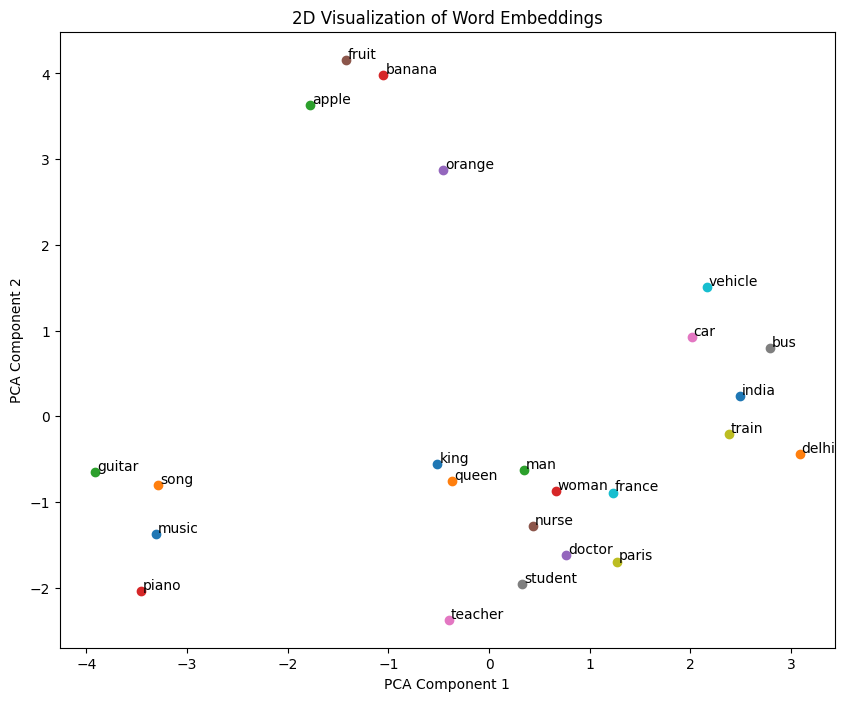

In [7]:
# Select 20–30 words
words = [
    "king","queen","man","woman",
    "doctor","nurse","teacher","student",
    "paris","france","india","delhi",
    "apple","banana","orange","fruit",
    "car","bus","train","vehicle",
    "music","song","guitar","piano"
]

# Get vectors
vectors = np.array([model[w] for w in words])

# Reduce dimensions using PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

# Plot scatter chart
plt.figure(figsize=(10,8))
for i, word in enumerate(words):
    plt.scatter(reduced[i, 0], reduced[i, 1])
    plt.text(reduced[i, 0]+0.02, reduced[i, 1]+0.02, word)

plt.title("2D Visualization of Word Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()
